PREDICIVE ANALYTICS AND Statistical Analysis

In [2]:
#Data transformation libraries
import pandas as pd
import io
from prophet import Prophet
from google.colab import files
uploaded = files.upload()
import numpy as np

#Data visualisation libraries
import matplotlib.pyplot as plt

#ANOVA table
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Saving Weekly Count1.csv to Weekly Count1.csv


In [3]:
df1 = pd.read_csv(io.BytesIO(uploaded['Weekly Count1.csv']))

In [11]:
df1.dropna()

,Jurisdiction_code,Jurisdiction,Week_end_date,State Abbreviation,Year,Week,Cause_grp,Num_of_death,Cause_Subgroup,Time_Period,Suppress,Note,Avg_Num_of_Deaths_Time,Diff_2015_to_2020,Percent_Diff_2015_to_2020,Type,Cause_grp_cod,Cause_subgrp_cod,log_Num_deaths


In [12]:
df1.head()
df1['log_Num_deaths'] = np.log2(df1['Num_of_death'])

ANOVA Implementation

212768.9660780993 0.0


,sum_sq,df,F,PR(>F)
C(log_Num_deaths),18799.249227,1019.0,11.271287,0.0
Residual,179341.378141,109569.0,NaN,NaN


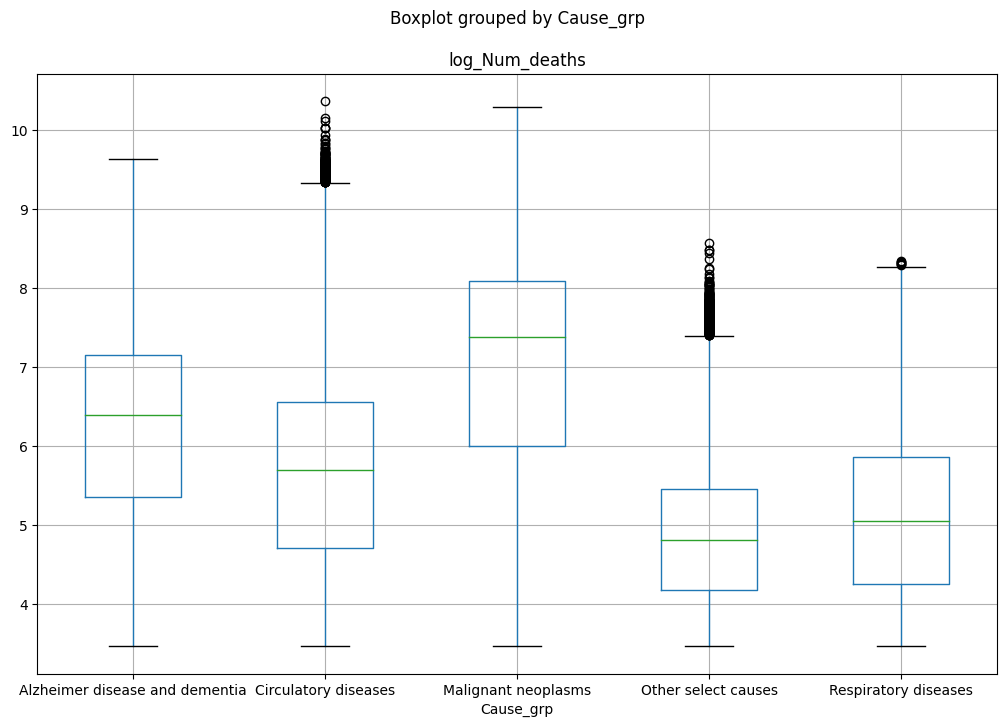

In [13]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['Cause_grp_cod'],df1['log_Num_deaths'])
print(fvalue, pvalue)

df1.boxplot('log_Num_deaths', by='Cause_grp', figsize=(12, 8))

# Ordinary Least Squares (OLS) model
model = ols('Cause_grp_cod ~ C(log_Num_deaths)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

ARIMA

In [6]:
df_arima = df1.rename(columns={'Week_end_date': 'ds', 'log_Num_deaths':'y'})
df_arima.head()

,Jurisdiction_code,Jurisdiction,ds,State Abbreviation,Year,Week,Cause_grp,Num_of_death,Cause_Subgroup,Time_Period,Suppress,Note,Avg_Num_of_Deaths_Time,Diff_2015_to_2020,Percent_Diff_2015_to_2020,Type,Cause_grp_cod,Cause_subgrp_cod,y
0,1,Alabama,05-01-2019,AL,2019,1,Alzheimer disease and dementia,115,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted),1,1,6.845490
1,1,Alabama,04-01-2020,AL,2020,1,Alzheimer disease and dementia,102,Alzheimer disease and dementia,2020,NaN,NaN,102,-1.0,-1.0,Predicted (weighted),1,1,6.672425
2,1,Alabama,09-01-2021,AL,2021,1,Alzheimer disease and dementia,122,Alzheimer disease and dementia,2021,NaN,NaN,122,19.0,18.4,Predicted (weighted),1,1,6.930737
3,1,Alabama,08-01-2022,AL,2022,1,Alzheimer disease and dementia,100,Alzheimer disease and dementia,2022,NaN,Data in recent weeks are incomplete. Only 60% ...,100,-3.0,-2.9,Predicted (weighted),1,1,6.643856
4,1,Alabama,07-01-2023,AL,2023,1,Alzheimer disease and dementia,113,Alzheimer disease and dementia,2023,NaN,Data in recent weeks are incomplete. Only 60% ...,113,10.0,9.7,Predicted (weighted),1,1,6.820179


In [7]:
grouped = df_arima.groupby('Cause_grp_cod')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet()
    m.fit(group)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    print(forecast.tail())

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:271: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/wim8hxxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/ex7y7i5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  6.370398    4.724410    8.068993     6.360735     6.381516   
573 2024-06-27  6.370510    4.655373    7.993179     6.360815     6.381692   
574 2024-06-28  6.370622    4.797137    7.951655     6.360895     6.381868   
575 2024-06-29  6.370735    4.693732    7.997542     6.360963     6.382043   
576 2024-06-30  6.370847    4.620219    7.966485     6.361034     6.382185   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572       -0.003361             -0.003361             -0.003361  0.048435   
573       -0.092845             -0.092845             -0.092845 -0.041753   
574       -0.030379             -0.030379             -0.030379  0.020095   
575       -0.039199             -0.039199             -0.039199  0.010717   
576       -0.105572             -0.105572             -0.105572 -0.056183   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/rcuoeoat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/2g160p9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89303', 'data', 'file=/tmp/tmp6a0q7y5b/rcuoeoat.json', 'init=/tmp/tmp6a0q7y5b/2g160p9l.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_model7i7pj16q/prophet_model-20230520154341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure cons

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  5.766675    4.008642    7.421305     5.762814     5.770570   
573 2024-06-27  5.766708    3.998540    7.380128     5.762839     5.770619   
574 2024-06-28  5.766742    4.096932    7.396045     5.762864     5.770667   
575 2024-06-29  5.766775    4.053964    7.355933     5.762887     5.770716   
576 2024-06-30  5.766809    4.155397    7.391478     5.762907     5.770764   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572       -0.031677             -0.031677             -0.031677 -0.001742   
573       -0.052854             -0.052854             -0.052854 -0.022250   
574       -0.006154             -0.006154             -0.006154  0.025256   
575       -0.037663             -0.037663             -0.037663 -0.005338   
576       -0.052927             -0.052927             -0.052927 -0.019612   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/oxis7f7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28859', 'data', 'file=/tmp/tmp6a0q7y5b/3_m_3jv3.json', 'init=/tmp/tmp6a0q7y5b/oxis7f7u.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_modelt67t1knv/prophet_model-20230520154350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  7.157145    5.339773    8.996009     7.150408     7.164007   
573 2024-06-27  7.157171    5.297507    9.022080     7.150397     7.164056   
574 2024-06-28  7.157197    5.177793    8.989756     7.150386     7.164105   
575 2024-06-29  7.157223    5.166491    8.935851     7.150375     7.164164   
576 2024-06-30  7.157249    5.209409    9.105761     7.150364     7.164225   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572        0.001529              0.001529              0.001529  0.009188   
573       -0.024741             -0.024741             -0.024741 -0.018216   
574        0.008201              0.008201              0.008201  0.013651   
575       -0.003681             -0.003681             -0.003681  0.000771   
576       -0.007195             -0.007195             -0.007195 -0.003647   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/b0kg42c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29002', 'data', 'file=/tmp/tmp6a0q7y5b/mlbpl6jb.json', 'init=/tmp/tmp6a0q7y5b/b0kg42c1.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_modelbupfptvr/prophet_model-20230520154353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  4.924885    3.741151    6.097490     4.918173     4.932717   
573 2024-06-27  4.924931    3.674908    5.977037     4.918190     4.932795   
574 2024-06-28  4.924978    3.827861    6.062932     4.918205     4.932898   
575 2024-06-29  4.925024    3.732956    6.045346     4.918221     4.933000   
576 2024-06-30  4.925071    3.664910    6.046471     4.918236     4.933092   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572       -0.026066             -0.026066             -0.026066  0.002207   
573       -0.028579             -0.028579             -0.028579  0.002013   
574       -0.031839             -0.031839             -0.031839  0.001027   
575       -0.031584             -0.031584             -0.031584  0.003433   
576       -0.055261             -0.055261             -0.055261 -0.018293   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/fo1sz0kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/7tjcokt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99081', 'data', 'file=/tmp/tmp6a0q7y5b/fo1sz0kg.json', 'init=/tmp/tmp6a0q7y5b/7tjcokt_.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_modelz6kmea4p/prophet_model-20230520154359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  5.383092    4.099542    6.608030     5.354216     5.412298   
573 2024-06-27  5.383469    4.000421    6.607400     5.354452     5.412839   
574 2024-06-28  5.383846    4.028663    6.676587     5.354629     5.413387   
575 2024-06-29  5.384223    4.022051    6.598628     5.354805     5.413986   
576 2024-06-30  5.384600    3.950103    6.612981     5.355009     5.414555   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572        0.014913              0.014913              0.014913  0.033676   
573       -0.042395             -0.042395             -0.042395 -0.022370   
574       -0.033012             -0.033012             -0.033012 -0.011476   
575       -0.027833             -0.027833             -0.027833 -0.004596   
576       -0.009698             -0.009698             -0.009698  0.015366   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

In [8]:
import pandas as pd
import statsmodels.api as sm
import math

# Load the data into a Pandas DataFrame
#df = pd.read_csv("Weekly Count1.csv")

# Set the 'Date' column as the index of the DataFrame
df_arima = df_arima.set_index("ds")

# Create a log-transformed variable 'log_total_death'
df_arima["log_total_death"] = df_arima["Num_of_death"].apply(lambda x: math.log(x))

# Identify the ARIMA model with up to 20 lags
model = sm.tsa.arima.ARIMA(df_arima["log_total_death"], order=(1,0,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

                               SARIMAX Results                                
Dep. Variable:        log_total_death   No. Observations:               110589
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4452.579
Date:                Sat, 20 May 2023   AIC                          -8897.159
Time:                        15:44:28   BIC                          -8858.705
Sample:                             0   HQIC                         -8885.541
                             - 110589                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9049      0.054     72.254      0.000       3.799       4.011
ar.L1          0.9946      0.000   2620.770      0.000       0.994       0.995
ma.L1         -0.6079      0.001   -588.593      0.0

<ipython-input-9-dd8083cccc42>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-9-dd8083cccc42>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df1.corr())


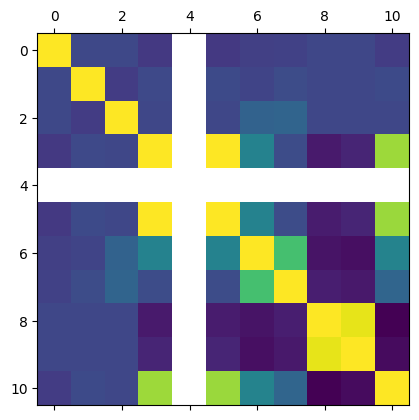

In [9]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# df1.plot()
# pyplot.show()

plt.matshow(df1.corr())
plt.show()

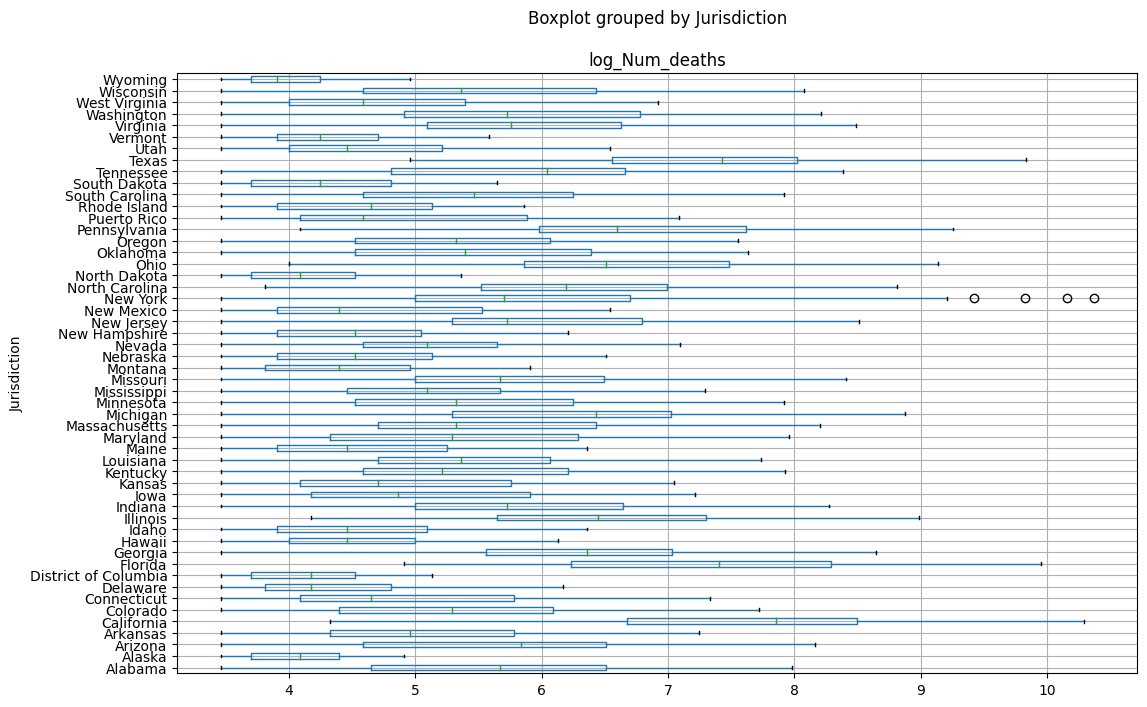

In [10]:
df1.boxplot('log_Num_deaths', by='Jurisdiction', figsize=(12, 8), vert=False)
plt.show()

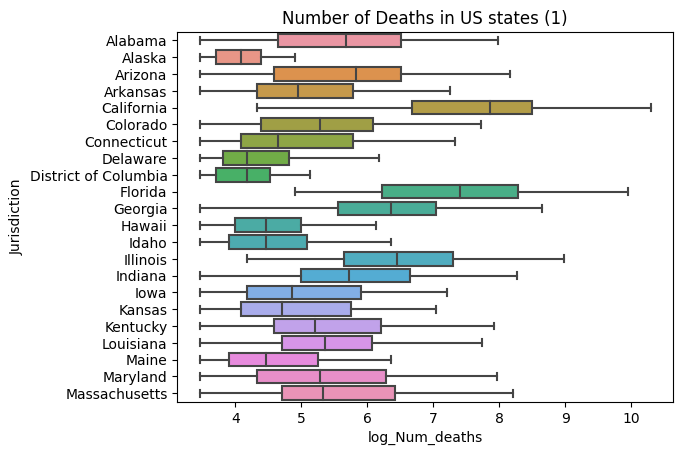

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
#df = pd.read_csv("Weekly Count1.csv")

# Filter the data for the specified states
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
          'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
          'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts']
df_filtered = df1.loc[df1['Jurisdiction'].isin(states)]

# Create a horizontal box plot of log_Num_deaths by Jurisdiction
sns.boxplot(data=df_filtered, x='log_Num_deaths', y='Jurisdiction')

# Set the title of the plot
plt.title('Number of Deaths in US states (1)')

# Display the plot
plt.show()

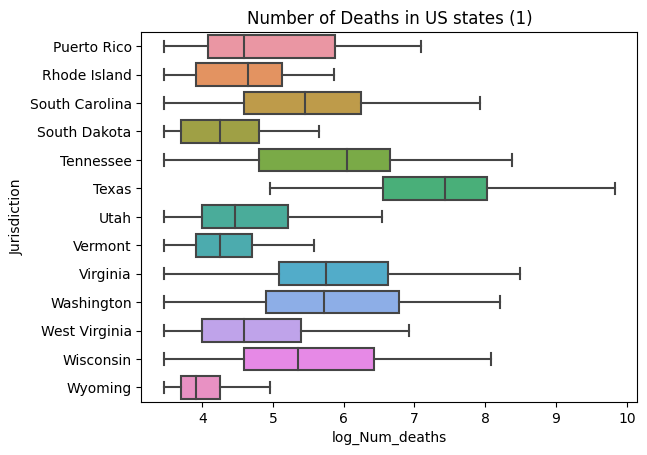

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
#df = pd.read_csv("Weekly Count1.csv")

# Filter the data for the specified states
states = ['Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 
'Wyoming', 'Puerto Rico']
df_filtered = df1.loc[df1['Jurisdiction'].isin(states)]

# Create a horizontal box plot of log_Num_deaths by Jurisdiction
sns.boxplot(data=df_filtered, x='log_Num_deaths', y='Jurisdiction')

# Set the title of the plot
plt.title('Number of Deaths in US states (1)')

# Display the plot
plt.show()

In [16]:
def freq_one_variable(dataset,var1):
    f=dataset[var1].value_counts(dropna=False)
    p=dataset[var1].value_counts(dropna=False, normalize=True)
    df=pd.concat([f,p], axis=1, keys=['frequency', 'percent'])
    df["cumfrequency"] = df["frequency"].cumsum()
    df["cumpercent"] = df["percent"].cumsum()
    return df

freq_one_variable(df1,"Cause_grp")

,frequency,percent,cumfrequency,cumpercent
Circulatory diseases,46267,0.418369,46267,0.418369
Respiratory diseases,22470,0.203185,68737,0.621554
Other select causes,20154,0.182242,88891,0.803796
Malignant neoplasms,11228,0.101529,100119,0.905325
Alzheimer disease and dementia,10470,0.094675,110589,1.000000


In [17]:
datax = df1['Cause_grp'].value_counts().sort_index()

# Create a dataframe
datay = pd.DataFrame({
  'state': datax.index,
  'Frequency': datax.values,
  'Percent': ((datax.values/datax.values.sum())*100).round(2),
  'Cumulative Frequency': datax.values.cumsum(),
  'Cumulative Percent': ((datax.values.cumsum()/datax.values.sum())*100)\
.round(2)
})

In [18]:
pd.crosstab(df1["Cause_grp"],df1["Cause_Subgroup"], normalize='all')

Cause_Subgroup,Alzheimer disease and dementia,Cerebrovascular diseases,Chronic lower respiratory disease,Diabetes,Heart failure,Hypertensive diseases,Influenza and pneumonia,Ischemic heart disease,Malignant neoplasms,Other diseases of the circulatory system,Other diseases of the respiratory system,Renal failure,Sepsis
Cause_grp,,,,,,,,,,,,,
Alzheimer disease and dementia,0.094675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
Circulatory diseases,0.000000,0.085144,0.000000,0.000000,0.068913,0.076545,0.000000,0.098889,0.000000,0.088879,0.000000,0.0000,0.000000
Malignant neoplasms,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101529,0.000000,0.000000,0.0000,0.000000
Other select causes,0.000000,0.000000,0.000000,0.076997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0561,0.049146
Respiratory diseases,0.000000,0.000000,0.085244,0.000000,0.000000,0.000000,0.053423,0.000000,0.000000,0.000000,0.064518,0.0000,0.000000


In [19]:
df2 = df1.groupby(['State Abbreviation','Jurisdiction'])['Num_of_death'].sum().reset_index().rename(columns={'State Abbreviation':'State_code'})

high_mort = df2[df2.Num_of_death > 321980]
avg_mort = df2[df2.Num_of_death.between(182090,321980)]
less_mort = df2[df2.Num_of_death.between(105668,182090)]

df2.sort_values(by='Num_of_death', ascending=False)

,State_code,Jurisdiction,Num_of_death
4,CA,California,895327
9,FL,Florida,686287
44,TX,Texas,672748
38,PA,Pennsylvania,424303
35,OH,Ohio,395029
14,IL,Illinois,347667
34,NY,New York,324878
22,MI,Michigan,321990
27,NC,North Carolina,308279
10,GA,Georgia,288230


In [20]:
df2.head(10)

,State_code,Jurisdiction,Num_of_death
0,AK,Alaska,5303
1,AL,Alabama,176631
2,AR,Arkansas,106629
3,AZ,Arizona,194160
4,CA,California,895327
5,CO,Colorado,117850
6,CT,Connecticut,95173
7,DC,District of Columbia,9189
8,DE,Delaware,22566
9,FL,Florida,686287


In [21]:
import plotly.express as px
fig = px.choropleth(df2,
                    locations='State_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Num_of_death',
                    color_continuous_scale="Viridis_r", 
      )
fig.show()

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3,subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=high_mort['State_code'], values=high_mort['Num_of_death'], name="High Mortality",title=f"<b>gt than 321980</b>", titleposition='top left'),
              1, 1)
fig.add_trace(go.Pie(labels=avg_mort['State_code'], values=avg_mort['Num_of_death'], name="Average Mortality",title=f"<b>Bt 182090 & 321980</b>", titleposition='top right'),
              1, 2)
fig.add_trace(go.Pie(labels=less_mort['State_code'], values=less_mort['Num_of_death'], name="less Mortality",title=f"<b>Ls < 182090 </b>", titleposition='top right'),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Percentage of mortalities",
    
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='High', x=0.14, y=0.5, font_size=20, showarrow=False),
                 dict(text='Avg', x=0.50, y=0.5, font_size=20, showarrow=False),
                 dict(text='Less', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()

ANOVA Implementation

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['Cause_grp_cod'],df1['log_Num_deaths'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

df1.boxplot('log_Num_deaths', by='Cause_grp', figsize=(1, 8))

# Ordinary Least Squares (OLS) model
model = ols('Cause_grp_cod ~ C(log_Num_deaths)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

ARIMA

In [24]:
df_arima = df1.rename(columns={'Week_end_date': 'ds', 'log_Num_deaths':'y'})
df_arima.head()

,Jurisdiction_code,Jurisdiction,ds,State Abbreviation,Year,Week,Cause_grp,Num_of_death,Cause_Subgroup,Time_Period,Suppress,Note,Avg_Num_of_Deaths_Time,Diff_2015_to_2020,Percent_Diff_2015_to_2020,Type,Cause_grp_cod,Cause_subgrp_cod,y
0,1,Alabama,05-01-2019,AL,2019,1,Alzheimer disease and dementia,115,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted),1,1,6.845490
1,1,Alabama,04-01-2020,AL,2020,1,Alzheimer disease and dementia,102,Alzheimer disease and dementia,2020,NaN,NaN,102,-1.0,-1.0,Predicted (weighted),1,1,6.672425
2,1,Alabama,09-01-2021,AL,2021,1,Alzheimer disease and dementia,122,Alzheimer disease and dementia,2021,NaN,NaN,122,19.0,18.4,Predicted (weighted),1,1,6.930737
3,1,Alabama,08-01-2022,AL,2022,1,Alzheimer disease and dementia,100,Alzheimer disease and dementia,2022,NaN,Data in recent weeks are incomplete. Only 60% ...,100,-3.0,-2.9,Predicted (weighted),1,1,6.643856
4,1,Alabama,07-01-2023,AL,2023,1,Alzheimer disease and dementia,113,Alzheimer disease and dementia,2023,NaN,Data in recent weeks are incomplete. Only 60% ...,113,10.0,9.7,Predicted (weighted),1,1,6.820179


In [25]:
grouped = df_arima.groupby('Cause_grp_cod')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet()
    m.fit(group)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    print(forecast.tail())

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/den6hey9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/yujm7sjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6143', 'data', 'file=/tmp/tmp6a0q7y5b/den6hey9.json', '

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  6.370398    4.691668    8.090279     6.359483     6.381081   
573 2024-06-27  6.370510    4.685354    8.003597     6.359556     6.381255   
574 2024-06-28  6.370622    4.655606    7.871918     6.359628     6.381428   
575 2024-06-29  6.370735    4.738924    7.964804     6.359702     6.381598   
576 2024-06-30  6.370847    4.678033    7.822910     6.359775     6.381763   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572       -0.003361             -0.003361             -0.003361  0.048435   
573       -0.092845             -0.092845             -0.092845 -0.041753   
574       -0.030379             -0.030379             -0.030379  0.020095   
575       -0.039199             -0.039199             -0.039199  0.010717   
576       -0.105572             -0.105572             -0.105572 -0.056183   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/1pl7vf4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/ymahu7mr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92384', 'data', 'file=/tmp/tmp6a0q7y5b/1pl7vf4v.json', 'init=/tmp/tmp6a0q7y5b/ymahu7mr.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_modelk217u8qo/prophet_model-20230520154755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure con

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  5.766675    4.100591    7.431935     5.762969     5.770863   
573 2024-06-27  5.766708    3.960792    7.309184     5.762990     5.770924   
574 2024-06-28  5.766742    4.007664    7.315291     5.762993     5.770985   
575 2024-06-29  5.766775    4.112412    7.242281     5.762981     5.771045   
576 2024-06-30  5.766809    4.185510    7.382598     5.762970     5.771101   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572       -0.031677             -0.031677             -0.031677 -0.001742   
573       -0.052854             -0.052854             -0.052854 -0.022250   
574       -0.006154             -0.006154             -0.006154  0.025256   
575       -0.037663             -0.037663             -0.037663 -0.005338   
576       -0.052927             -0.052927             -0.052927 -0.019612   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/hmlkk0iv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59220', 'data', 'file=/tmp/tmp6a0q7y5b/vur0pmra.json', 'init=/tmp/tmp6a0q7y5b/hmlkk0iv.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_model5mvsqp73/prophet_model-20230520154804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/proph

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  7.157145    5.295914    8.944124     7.149673     7.163830   
573 2024-06-27  7.157171    5.298790    8.928033     7.149665     7.163886   
574 2024-06-28  7.157197    5.204420    9.107715     7.149657     7.163939   
575 2024-06-29  7.157223    5.281157    9.043664     7.149640     7.163992   
576 2024-06-30  7.157249    5.279222    9.062798     7.149611     7.164044   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572        0.001529              0.001529              0.001529  0.009188   
573       -0.024741             -0.024741             -0.024741 -0.018216   
574        0.008201              0.008201              0.008201  0.013651   
575       -0.003681             -0.003681             -0.003681  0.000771   
576       -0.007195             -0.007195             -0.007195 -0.003647   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/i3egrcp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36478', 'data', 'file=/tmp/tmp6a0q7y5b/dr0ihkps.json', 'init=/tmp/tmp6a0q7y5b/i3egrcp6.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_modelzf7o4zlm/prophet_model-20230520154807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/proph

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  4.924885    3.749306    5.963816     4.918741     4.932100   
573 2024-06-27  4.924931    3.771606    5.958525     4.918765     4.932175   
574 2024-06-28  4.924978    3.691892    6.010287     4.918791     4.932252   
575 2024-06-29  4.925024    3.765342    6.018431     4.918837     4.932322   
576 2024-06-30  4.925071    3.797444    6.029912     4.918890     4.932391   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572       -0.026066             -0.026066             -0.026066  0.002207   
573       -0.028579             -0.028579             -0.028579  0.002013   
574       -0.031839             -0.031839             -0.031839  0.001027   
575       -0.031584             -0.031584             -0.031584  0.003433   
576       -0.055261             -0.055261             -0.055261 -0.018293   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a0q7y5b/gu7k8b5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50011', 'data', 'file=/tmp/tmp6a0q7y5b/vof_la19.json', 'init=/tmp/tmp6a0q7y5b/gu7k8b5z.json', 'output', 'file=/tmp/tmp6a0q7y5b/prophet_modelgds7i0px/prophet_model-20230520154812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
572 2024-06-26  5.383092    4.133979    6.716730     5.353105     5.412121   
573 2024-06-27  5.383469    4.057713    6.632149     5.353347     5.412648   
574 2024-06-28  5.383846    4.058389    6.685129     5.353589     5.413175   
575 2024-06-29  5.384223    3.955511    6.717911     5.353831     5.413702   
576 2024-06-30  5.384600    4.032533    6.652777     5.354073     5.414229   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
572        0.014913              0.014913              0.014913  0.033676   
573       -0.042395             -0.042395             -0.042395 -0.022370   
574       -0.033012             -0.033012             -0.033012 -0.011476   
575       -0.027833             -0.027833             -0.027833 -0.004596   
576       -0.009698             -0.009698             -0.009698  0.015366   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_uppe

In [26]:
import pandas as pd
import statsmodels.api as sm
import math

# Load the data into a Pandas DataFrame
#df = pd.read_csv("Weekly Count1.csv")

# Set the 'Date' column as the index of the DataFrame
df_arima = df_arima.set_index("ds")

# Create a log-transformed variable 'log_total_death'
df_arima["log_total_death"] = df_arima["Num_of_death"].apply(lambda x: math.log(x))

# Identify the ARIMA model with up to 20 lags
model = sm.tsa.arima.ARIMA(df_arima["log_total_death"], order=(1,0,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/s

                               SARIMAX Results                                
Dep. Variable:        log_total_death   No. Observations:               110589
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4452.579
Date:                Sat, 20 May 2023   AIC                          -8897.159
Time:                        15:48:38   BIC                          -8858.705
Sample:                             0   HQIC                         -8885.541
                             - 110589                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9049      0.054     72.254      0.000       3.799       4.011
ar.L1          0.9946      0.000   2620.770      0.000       0.994       0.995
ma.L1         -0.6079      0.001   -588.593      0.0

<ipython-input-27-dd8083cccc42>:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

<ipython-input-27-dd8083cccc42>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



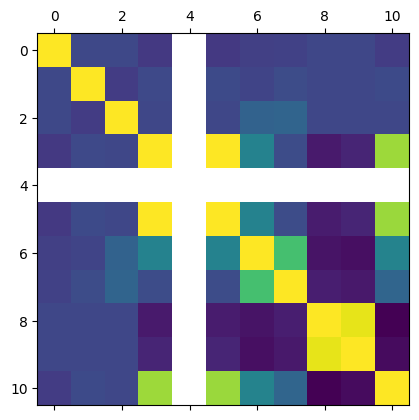

In [27]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# df1.plot()
# pyplot.show()

plt.matshow(df1.corr())
plt.show()

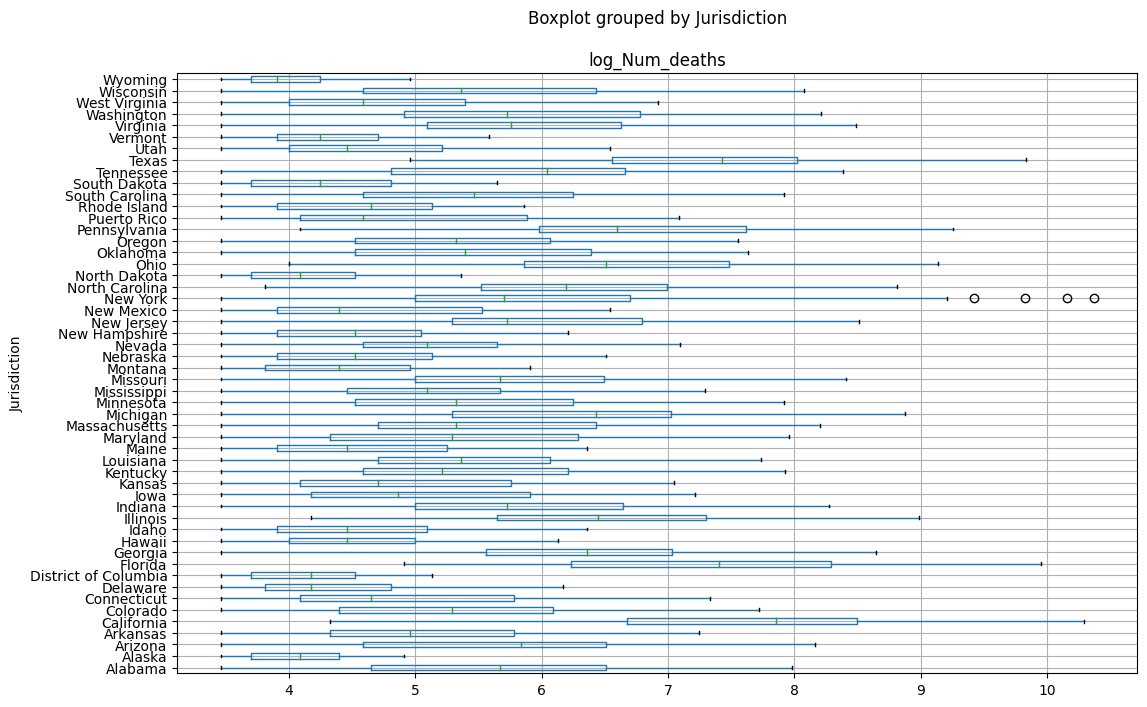

In [28]:
df1.boxplot('log_Num_deaths', by='Jurisdiction', figsize=(12, 8), vert=False)
plt.show()